In [15]:
import tifffile as tiff
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import aligner as alg
import autoutaligner as autoalg

In [16]:
folder = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\03_UT_data\Panel PEGASO\pruebas\Pruebas Pegatinas\doble cara 7\35')

output_folder = folder / 'output'

if not output_folder.exists():

    output_folder.mkdir()
    

filename = folder / '35.tif'

data = tiff.imread(filename)

#data is in the form z,x,y, where z is the depth, x is the width and y is the height
#data is a volume of signals, z is the signal x and y the pixels

data.shape

(505, 157, 53)

In [17]:
gate = autoalg.auto_gate(data)
aligned = alg.align(data, gate)

In [23]:
aux = autoalg.crop_image_center(aligned[0])
cropped = np.zeros((aligned.shape[0], aux.shape[0], aux.shape[1]), dtype=aligned.dtype)
for i in range(aligned.shape[0]):
    cropped[i] = autoalg.crop_image_center(aligned[i])

cropped.shape

(505, 78, 53)

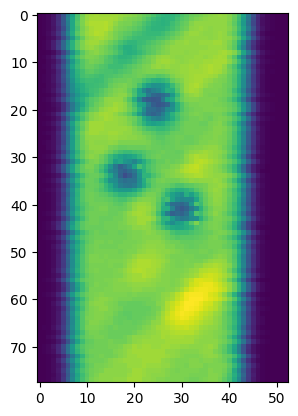

In [24]:
plt.imshow(cropped[gate[0]])

In [26]:
angle = alg.get_angle(cropped,gate)

threshold value is:  42
The rotation angle of the largest component is -0.17655560398622502 degrees.


In [29]:
from scipy.ndimage import rotate

data_rotated = rotate(aligned,angle,axes=(1,2),reshape=True)

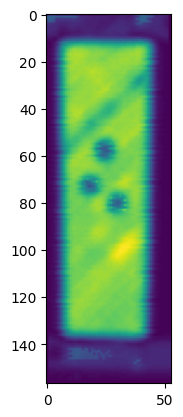

In [30]:
plt.imshow(data_rotated[gate[0]])